# Let's Practice: Lab1B

In [51]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Lab1B.py
# Author      : Dilan Castañeda                                             
# Created On  : September 17, 2024                                           
# Last Update : September 17, 2024                                         
# Version     : 1.0.0                                          
# Description : Loads the Iris dataset, verifies data types, generates seaborn boxplots, overlays swarmplots, and analyzes species-separating variables and outliers.           
# ─────────────────────────────────────────────────────────────────────────────

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Extract

In [10]:
# 1) Load the iris dataset: iris.csv
df = pd.read_csv(r'C:\Users\dilan\Documents\Github\DataAnalysis_and_AI\period_2\Resources\Datasets\iris.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
67,5.8,2.7,4.1,1.0,versicolor
97,6.2,2.9,4.3,1.3,versicolor
45,4.8,3.0,1.4,0.3,setosa
51,6.4,3.2,4.5,1.5,versicolor


## Trasnform

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# 2) Verify the data types (Hint: “species” should be set to ‘string’
df['species'] = df['species'].astype('string')

# Show the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    string 
dtypes: float64(4), string(1)
memory usage: 6.0 KB


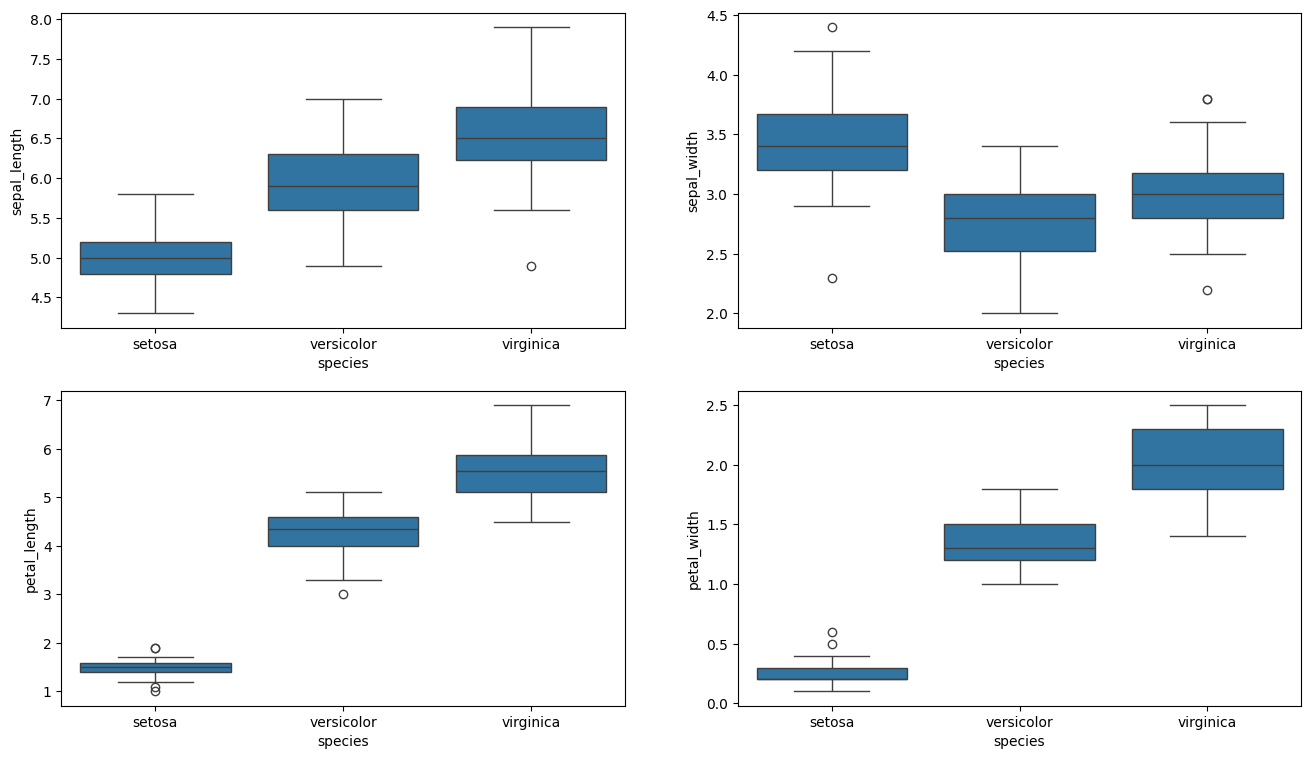

In [17]:
# 3) Generate a boxplot for each numerical column. Use the seaborn.boxplot function
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

for i, ax in enumerate(axes.flat):
    sns.boxplot(x='species', y=df.columns[i], data=df, ax=ax)

In [22]:
# 4) Generate a boxplot of sepal_width grouped by species. For each boxplot calculate lower and upper whiskers, Q1, Q3, and median.
# Calculate the lower and upper whiskers, Q1, Q3, and median for sepal_width grouped by species
sepal_width_quantiles = df.groupby('species')['sepal_width'].quantile([0.25, 0.75]).unstack()
sepal_width_median = df.groupby('species')['sepal_width'].median()

IQR = sepal_width_quantiles[0.75] - sepal_width_quantiles[0.25]
sepal_width_whiskers = pd.DataFrame({
    'Lower Whisker': sepal_width_quantiles[0.25] - 1.5 * IQR,
    'Upper Whisker': sepal_width_quantiles[0.75] + 1.5 * IQR
})

# Print the results
print('Sepal Width Quantiles:')
print(sepal_width_quantiles)

print('\nSepal Width Whiskers:')
print(sepal_width_whiskers)

print('\nSepal Width Median:')
print(sepal_width_median)


Sepal Width Quantiles:
             0.25   0.75
species                 
setosa      3.200  3.675
versicolor  2.525  3.000
virginica   2.800  3.175

Sepal Width Whiskers:
            Lower Whisker  Upper Whisker
species                                 
setosa             2.4875         4.3875
versicolor         1.8125         3.7125
virginica          2.2375         3.7375

Sepal Width Median:
species
setosa        3.4
versicolor    2.8
virginica     3.0
Name: sepal_width, dtype: float64


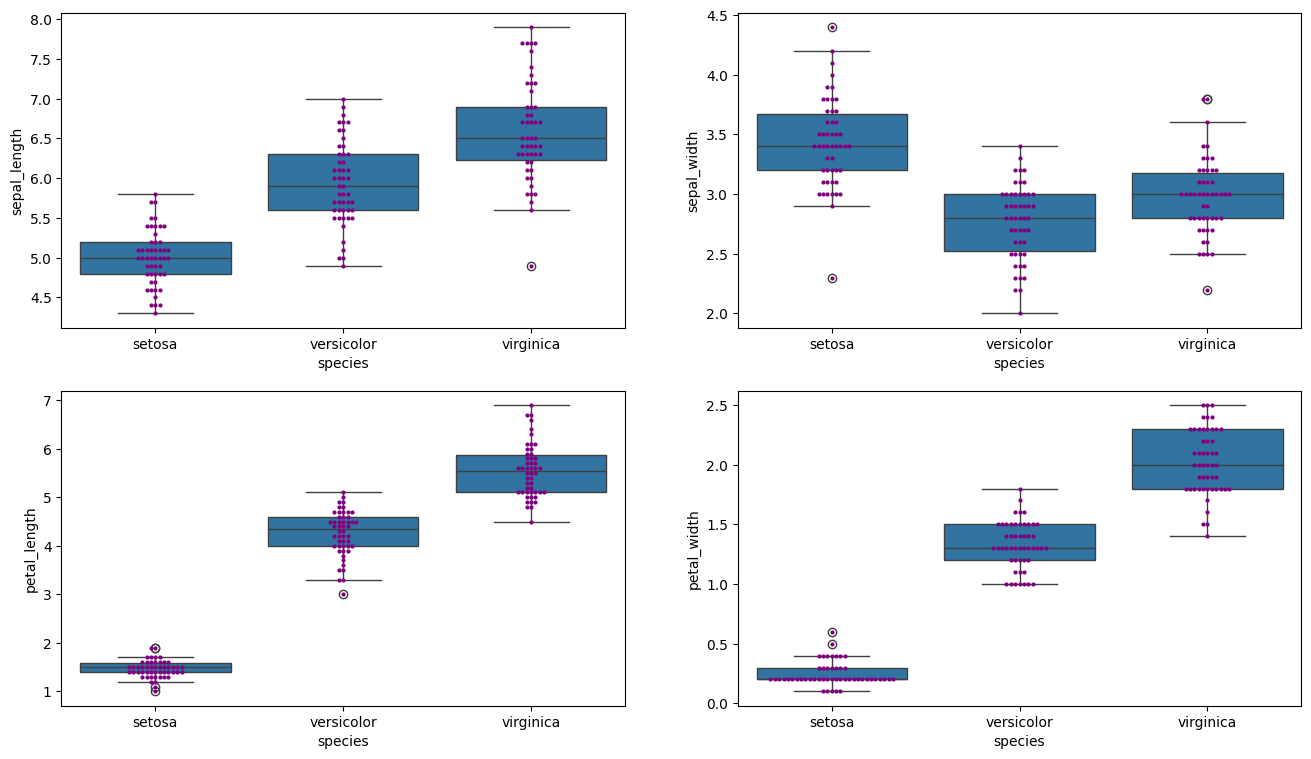

In [28]:
# 5) In the previous boxplot, overlay a swarmplot to look at individual data points.
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

for i, ax in enumerate(axes.flat):
    sns.boxplot(x='species', y=df.columns[i], data=df, ax=ax)
    sns.swarmplot(x='species', y=df.columns[i], data=df, color='purple', ax=ax, s = 3)

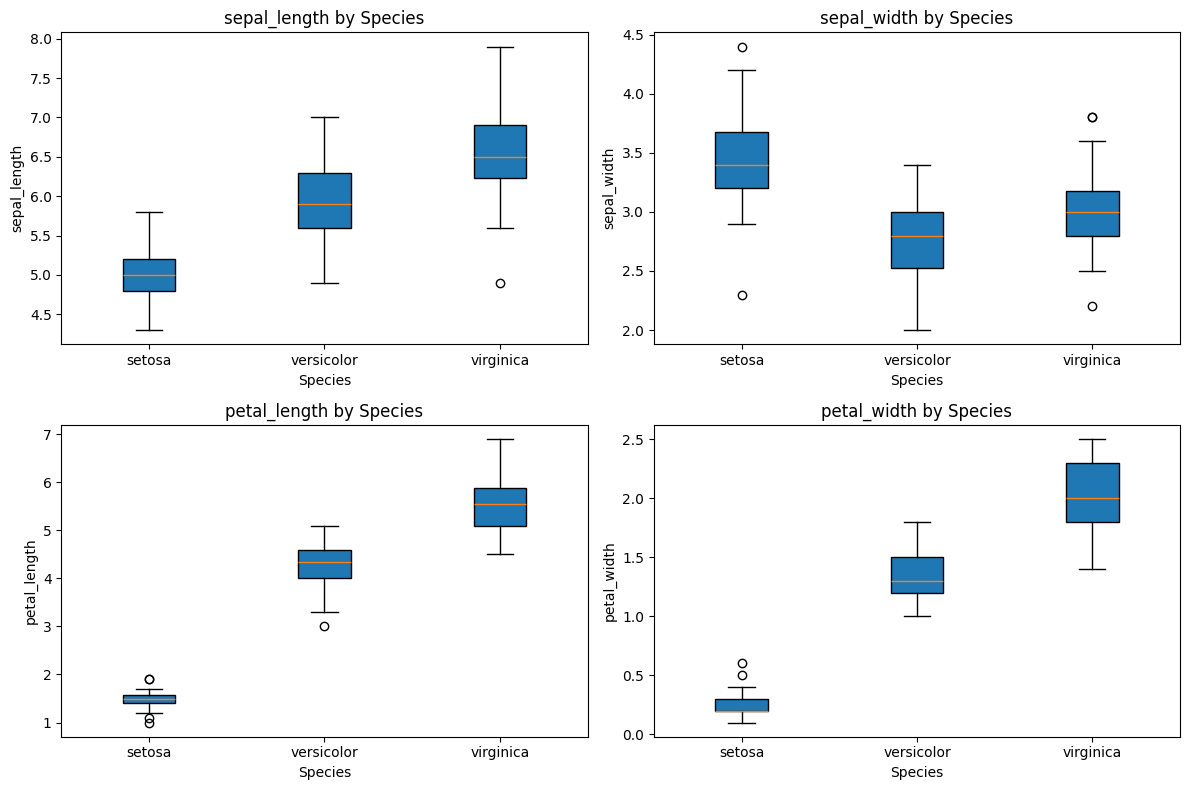

In [40]:
# 6) Generate a panel with 4 figures using matplotlib.pyplot subplots function. Each panel should display a boxplot by species for each of the 4 numerical variables (sepal length, sepal width, petal length, petal width)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, feature in enumerate(df.columns[:4]):  # Assuming the first 4 columns are the features
    ax = axes.flat[i]
    
    # Create lists to store data for each species
    data = [df[df['species'] == species][feature] for species in df['species'].unique()]
    
    # Create the boxplot
    bp = ax.boxplot(data, patch_artist=True, tick_labels=df['species'].unique())
    
    # Set labels and title
    ax.set_xlabel('Species')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} by Species')

plt.tight_layout()
plt.show()